In [1]:
import pandas as pd
import ast
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%load_ext autoreload
%autoreload 2

EDA steam Games

In [2]:
steam_games_ruta = 'datos/output_steam_games.json'

# El json se va a leer linea por linea 
filas_json = []
with open(steam_games_ruta) as f:
    for line in f.readlines():
        data = json.loads(line)
        filas_json.append(data)

# Se almacena en un data frame de pandas
df_games = pd.DataFrame(filas_json)
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [3]:
#cuento los vacios
df_games.isna().sum()

publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price           89687
early_access    88310
id              88312
developer       91609
dtype: int64

In [4]:
#borro los vacios y los vuelvo a contar
df_games = df_games.dropna().reset_index(drop=True)
df_games.isna().sum()

publisher       0
genres          0
app_name        0
title           0
url             0
release_date    0
tags            0
reviews_url     0
specs           0
price           0
early_access    0
id              0
developer       0
dtype: int64

In [5]:
#se ve información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     22530 non-null  object
 1   genres        22530 non-null  object
 2   app_name      22530 non-null  object
 3   title         22530 non-null  object
 4   url           22530 non-null  object
 5   release_date  22530 non-null  object
 6   tags          22530 non-null  object
 7   reviews_url   22530 non-null  object
 8   specs         22530 non-null  object
 9   price         22530 non-null  object
 10  early_access  22530 non-null  object
 11  id            22530 non-null  object
 12  developer     22530 non-null  object
dtypes: object(13)
memory usage: 2.2+ MB


In [6]:
# se observa tipo de dato y valores unicos de early_access
print(df_games['early_access'].dtype)
print("---"*10)
df_games['early_access'].unique()

object
------------------------------


array([False, True], dtype=object)

In [ ]:
# se cambia el tipo de dato de string a bool
df_games['early_access'] = df_games['early_access'].astype(bool)

In [7]:
# se cambia el tipo de dato de string a flotante y se asigna cero para los casos especiales
df_games['price'] = df_games['price'].apply(lambda x: round(float(x), 3) if str(x).replace('.', '', 1).isdigit() else 0).astype('float32')

In [8]:
#   se observa tipo de dato y valores unicos de price
print(df_games['price'].dtype)
print("---"*10)
df_games['price'].unique()

float32
------------------------------


array([4.9900e+00, 0.0000e+00, 9.9000e-01, 3.9900e+00, 1.8990e+01,
       2.9990e+01, 1.0990e+01, 2.9900e+00, 1.5900e+00, 1.4990e+01,
       1.9900e+00, 5.9990e+01, 9.9900e+00, 6.9900e+00, 7.9900e+00,
       3.9990e+01, 1.9990e+01, 7.4900e+00, 8.9900e+00, 1.2990e+01,
       5.9900e+00, 2.4900e+00, 1.5990e+01, 1.2500e+00, 2.4990e+01,
       1.7990e+01, 6.1990e+01, 3.4900e+00, 1.1990e+01, 1.3990e+01,
       3.4990e+01, 1.4900e+00, 3.2990e+01, 9.9990e+01, 1.4950e+01,
       6.9990e+01, 1.6990e+01, 7.9990e+01, 4.9990e+01, 1.3980e+01,
       1.4999e+02, 7.7171e+02, 2.1990e+01, 8.9990e+01, 9.8000e-01,
       1.3992e+02, 4.2900e+00, 5.4990e+01, 6.4990e+01, 7.4990e+01,
       8.9000e-01, 5.0000e-01, 2.9999e+02, 1.2900e+00, 1.1999e+02,
       4.4990e+01, 3.0000e+00, 1.5000e+01, 1.3900e+00, 2.0000e+00,
       4.0000e+00, 1.9500e+00, 1.5000e+00, 6.6600e+00, 2.6990e+01,
       3.9999e+02, 3.1990e+01, 2.0000e+01, 4.0000e+01, 5.0000e+00,
       3.3300e+00, 3.8850e+01, 7.1700e+01, 9.9500e+02, 5.4900e

In [9]:
#   se observa tipo de dato y valores unicos de genres
print(df_games['genres'].dtype)
print("---"*10)
df_games['genres'].unique

object
------------------------------


<bound method Series.unique of 0            [Action, Casual, Indie, Simulation, Strategy]
1                     [Free to Play, Indie, RPG, Strategy]
2        [Casual, Free to Play, Indie, Simulation, Sports]
3                              [Action, Adventure, Casual]
4                          [Action, Adventure, Simulation]
                               ...                        
22525                   [Action, Adventure, Casual, Indie]
22526                [Casual, Indie, Simulation, Strategy]
22527                            [Casual, Indie, Strategy]
22528                          [Indie, Racing, Simulation]
22529                                      [Casual, Indie]
Name: genres, Length: 22530, dtype: object>

EDA items

In [2]:
user_items_ruta = 'datos/australian_users_items.json'

# Lista para almacenar los diccionarios JSON de cada línea
data_list = []

# Abrir el archivo y procesar cada línea
with open(user_items_ruta, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            # Usar ast.literal_eval para convertir la línea en un diccionario
            json_data = ast.literal_eval(line)
            data_list.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue

# Crear un DataFrame a partir de la lista de diccionarios
df_items = pd.DataFrame(data_list)

In [3]:
# se revisan los registros nulos
df_items.isna().sum()

user_id        0
items_count    0
steam_id       0
user_url       0
items          0
dtype: int64

In [4]:
# Se revisan los registros duplicados
df_items.duplicated().sum()

TypeError: unhashable type: 'list'

EDA reviews

In [5]:
user_reviews_ruta = 'datos/australian_user_reviews.json'

# Lista para almacenar los diccionarios JSON de cada línea
data_list = []

# Abrir el archivo y procesar cada línea
with open(user_reviews_ruta, 'r', encoding='utf-8') as file:
    for line in file:
        try:
            # Usar ast.literal_eval para convertir la línea en un diccionario
            json_data = ast.literal_eval(line)
            data_list.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {line}")
            continue

# Crear un DataFrame a partir de la lista de diccionarios
df_reviews = pd.DataFrame(data_list)

KeyboardInterrupt: 

In [ ]:
# Se buscan los duplicados que puedan haber por cada user_id
duplicated_rows = df_reviews[df_reviews.duplicated(subset='user_id', keep=False)]
duplicated_rows_sorted = duplicated_rows.sort_values(by='user_id')
duplicated_rows_sorted

EDA recommendation

In [2]:
df_games = pd.read_csv('datos/steam_games_clean.csv', encoding='utf-8')

In [3]:
df_reviews = pd.read_csv('datos/user_reviews_clean.csv', encoding='utf-8',sep="\t")

In [4]:
df_items = pd.read_csv('datos/user_items_clean.csv', encoding='utf-8')

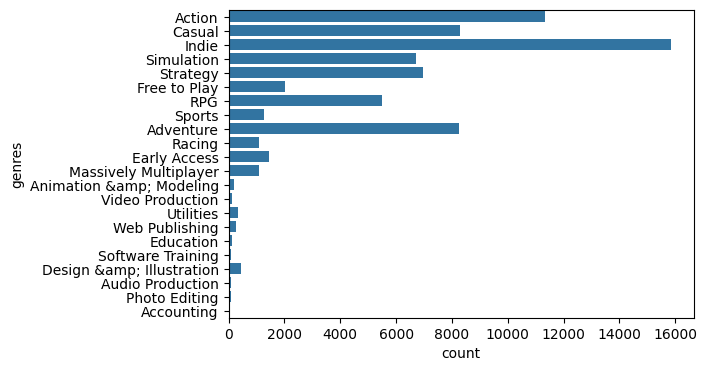

In [5]:
# Se comienza a hacer un EDA para conocer mejor los datos en el df_games
plt.figure(figsize=(6, 4))
# Se observa la cantidad de juegos por genero
sns.countplot(data=df_games, y='genres', orient='h')
plt.show()

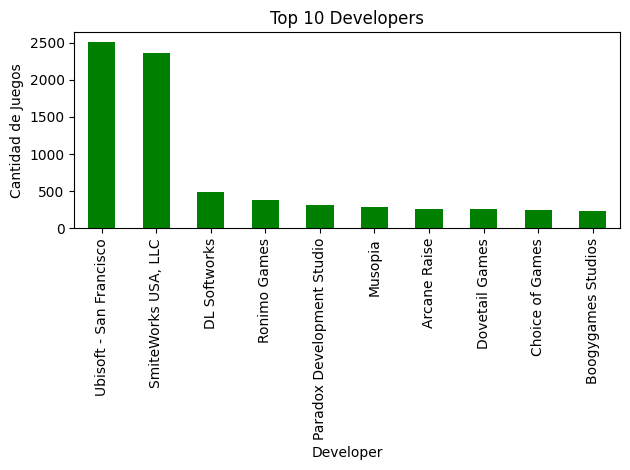

In [6]:
# Se revisa la cantidad de juegos por developer
dev_count = df_games['developer'].value_counts()
dev_count[:10].plot(kind='bar', color='green')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Se muestra la gráfica de salida
plt.tight_layout()
plt.show()

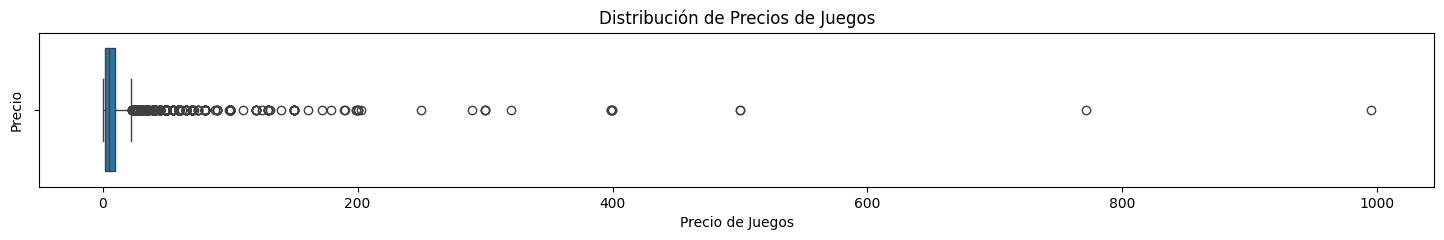

In [7]:
# Obtener los precios para cada juego y crear un DataFrame
unique_prices = df_games.groupby('id')['price'].unique().explode().reset_index()

# Crear la figura y el boxplot directamente con Seaborn
plt.figure(figsize=(18, 2))
ax = sns.boxplot(data=unique_prices, x='price')
ax.set_xlabel('Precio de Juegos')
ax.set_ylabel('Precio')
ax.set_title('Distribución de Precios de Juegos')

plt.show()

/tmp/ipykernel_6895/3798471524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])
/tmp/ipykernel_6895/3798471524.py:6: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])


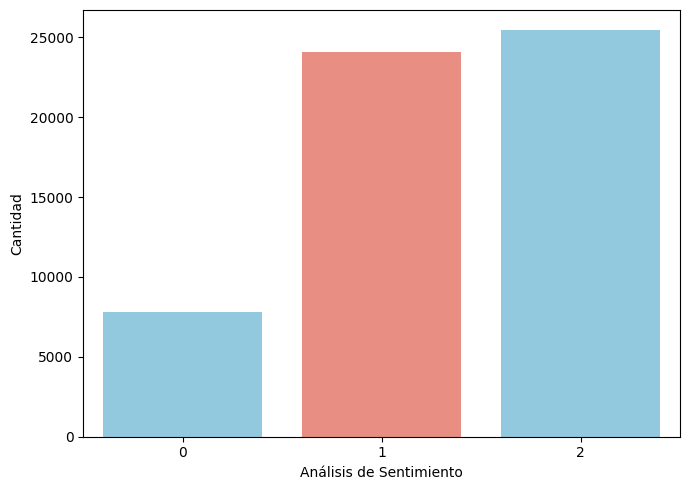

In [8]:
#Ahora se hará el EDA respecto al data frame reviews
#En este caso se hará un count plot de analisis de sentimiento

# Countplot para 'sentiment_analysis'
plt.figure(figsize=(7, 5))
sns.countplot(data=df_reviews, x='sentiment_analysis', palette=["skyblue", "salmon"])
plt.xlabel('Análisis de Sentimiento')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

/tmp/ipykernel_6895/413241484.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_reviews["reviews_date"] = pd.to_datetime(df_date_reviews["reviews_date"])


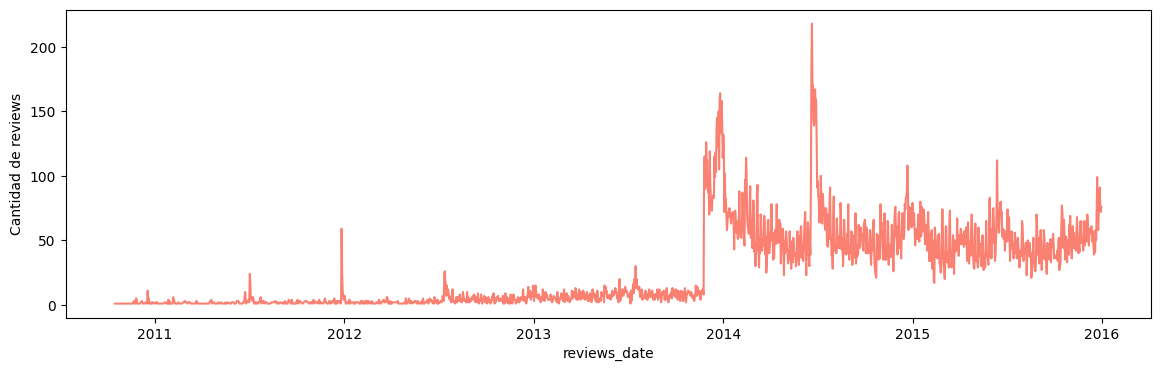

In [9]:
# Como hay campos no disponibles se filtra por unicamente fechas
df_date_reviews = df_reviews[df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")]
# Se pone el formato como date
df_date_reviews["reviews_date"] = pd.to_datetime(df_date_reviews["reviews_date"])

# Se calcula las reviews por la fecha
df_counts = df_date_reviews.groupby("reviews_date").count()

plt.figure(figsize=(14, 4))
sns.lineplot(data=df_counts, x="reviews_date", y="reviews_recommend",color='salmon')
plt.ylabel('Cantidad de reviews')
plt.show()

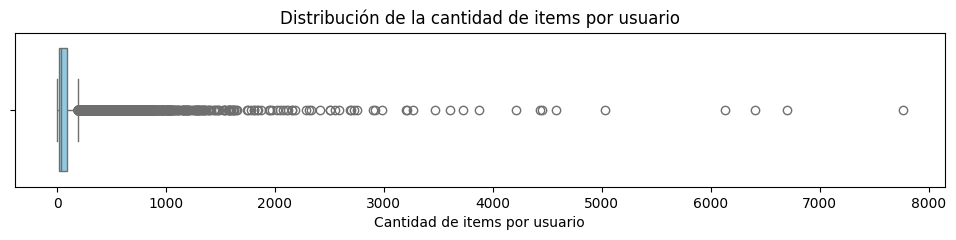

In [10]:
#Finalmente, se continua con el eda de Items

# Se junta la cantidad de usuarios y items para el conteo
items_count_user = df_items.groupby('user_id')['items_count'].count().reset_index()
items_count_user = items_count_user.sort_values('items_count', ascending=False)

# Crear el gráfico de caja (boxplot)
plt.figure(figsize=(12, 2))
sns.boxplot(data=items_count_user, x='items_count', color='skyblue')
plt.xlabel('Cantidad de items por usuario')
plt.title('Distribución de la cantidad de items por usuario')

plt.show()

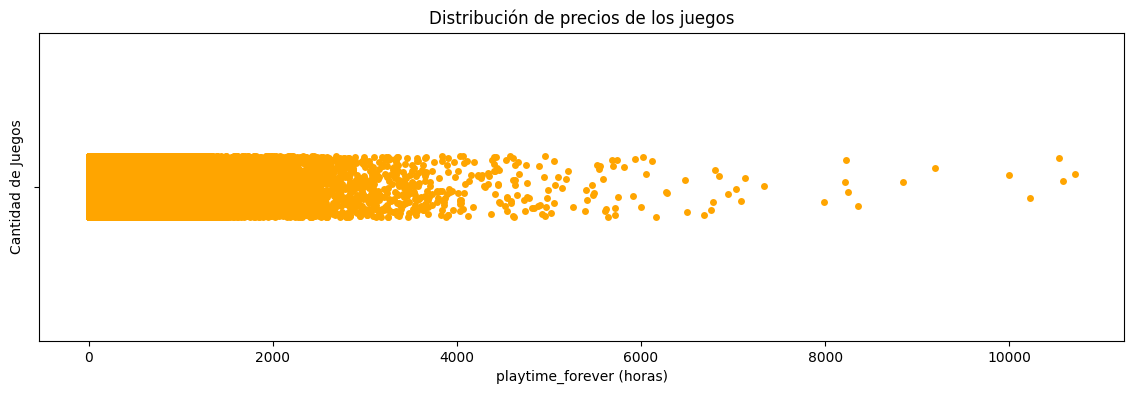

In [11]:
# Se calculan las horas para el grafico
df_items['playtime_hours'] = df_items['playtime_forever'] / 60
# Grafico de dispersion de horas por la cantidad de juegos
plt.figure(figsize=(14, 4))
sns.stripplot(data=df_items, x='playtime_hours', color='orange')
plt.xlabel('playtime_forever (horas)')
plt.ylabel('Cantidad de Juegos')
plt.title('Distribución de precios de los juegos')

plt.show()

In [12]:
# Se asigna pesos a cada característica
weight_reviews = 0.7
weight_sentiment = 0.3

In [13]:
# Se calcula la métrica combinada
df_reviews['combined_metric'] = (weight_reviews * df_reviews['reviews_recommend'].astype(int)) + (weight_sentiment * df_reviews['sentiment_analysis'])

In [14]:
#Se dejan unicamente las columnas necesarias
df_reviews = df_reviews[['user_id', 'reviews_item_id', 'combined_metric']]
df_reviews.head(2)

,user_id,reviews_item_id,combined_metric
0,76561197970982479,1250,1.3
1,js41637,251610,1.3


In [15]:
# Se agarran las columnas necesarias de items y se borran los dumplicados
df_items = df_items[['item_id', 'item_name']]
df_items = df_items.drop_duplicates()

In [16]:
#Se agrega este df de items con los nombres de los juegos al df de reviews
df_for_pivot = df_reviews.merge(df_items, left_on="reviews_item_id", right_on="item_id", how='left')

In [17]:
# Se borran los nulos
df_for_pivot = df_for_pivot.dropna(subset=['item_id'])

In [18]:
# Se dejan unicamente las columnas para la matriz pivot
df_model = df_for_pivot[['user_id', 'item_name', 'combined_metric']]
df_model.head()

,user_id,item_name,combined_metric
0,76561197970982479,Killing Floor,1.3
1,js41637,Barbie™ Dreamhouse Party™,1.3
2,evcentric,Risk of Rain,1.3
3,doctr,The Wolf Among Us,1.3
4,maplemage,Dark Souls: Prepare to Die Edition,1.0


In [19]:
df_model_ruta = 'datos/recommendation_model.parquet'
df_model.to_parquet(df_model_ruta, index=False)